In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'numpy'

In [ ]:
file_path = r'C:\Users\crhac\CATSSP\CATSSP\CGL\cgl_33.catsp'

with open(file_path, 'r') as f:
    lines = f.readlines()

In [12]:
for line in lines:
    if "DIMENSION" in line:
        n = int(line.strip().split(":")[1])
        break

for idx, line in enumerate(lines):
    if "EDGE_WEIGHT_SECTION" in line:
        start_idx = idx + 1
        break

In [13]:
costos = []
for i in range(n):
    fila = list(map(int, lines[start_idx + i].strip().split()))
    costos.append(fila)

In [14]:
C = np.array(costos)
print(f"Matriz de costos cargada con dimensión {C.shape}")
print(C)

nodos = list(range(n))
solucion = []
actual = 0 
visitados = {actual}
solucion.append(actual)

Matriz de costos cargada con dimensión (34, 34)
[[  -1  179 1247 ...   -1   -1    0]
 [ 208   -1 1227 ...   -1   -1    0]
 [1284 1232   -1 ...   -1   -1    0]
 ...
 [  -1   -1   -1 ...   -1    0    0]
 [  -1   -1   -1 ...    0   -1    0]
 [   0    0    0 ...    0    0    0]]


In [15]:
while len(visitados) < n:
    costos_permitidos = [(j, C[actual, j]) for j in nodos if j not in visitados and C[actual, j] != -1]
    if not costos_permitidos:
        break
    siguiente = min(costos_permitidos, key=lambda x: x[1])[0]
    solucion.append(siguiente)
    visitados.add(siguiente)
    actual = siguiente

costo_total = 0
for i in range(len(solucion) - 1):
    costo_total += C[solucion[i], solucion[i+1]]

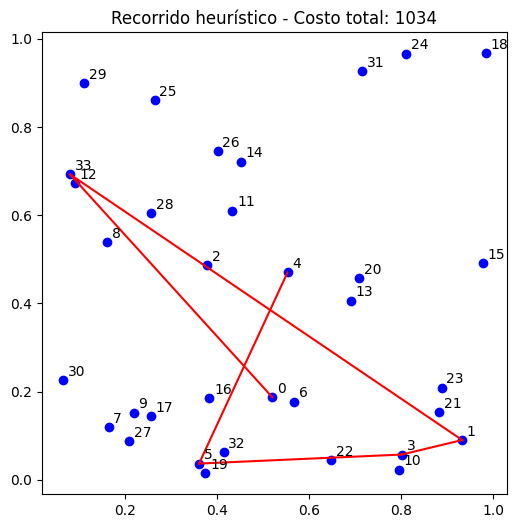

   Posición  Nodo
0         0     0
1         1    33
2         2     1
3         3     3
4         4     5
5         5     4
Costo total de la solución heurística: 1034


In [16]:
plt.figure(figsize=(6, 6))
puntos = np.random.rand(n, 2)
for i in range(n):
    plt.scatter(puntos[i, 0], puntos[i, 1], c='blue')
    plt.text(puntos[i, 0]+0.01, puntos[i, 1]+0.01, str(i), fontsize=10)
for i in range(len(solucion) - 1):
    plt.plot([puntos[solucion[i], 0], puntos[solucion[i+1], 0]],
             [puntos[solucion[i], 1], puntos[solucion[i+1], 1]], 'r-')
plt.title(f'Recorrido heurístico - Costo total: {costo_total}')
plt.show()

df_resultado = pd.DataFrame({'Posición': range(len(solucion)), 'Nodo': solucion})
print(df_resultado)
print(f"Costo total de la solución heurística: {costo_total}")
